In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import os

os.environ["PATH_TO_ENV"] = "~/projects/chatsky-llm-autoconfig/.env"

In [3]:
from settings import EnvSettings

env_settings = EnvSettings()
env_settings.GENERATION_MODEL_NAME

'o3-mini'

In [5]:
from three_stages_1 import ThreeStagesGraphGenerator as Generator
from three_stages_0i import ThreeStagesGraphGenerator as GeneratorI0

graph_generator = Generator("o3-mini")  # To generate 1st graph from one dialogue
graph_generator_llm = GeneratorI0()  # To add dialogue to existing graph with LLM

In [ ]:
import json
from dialogue2graph.pipelines.core.dialogue import Dialogue
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.metrics.no_llm_metrics import triplet_match_accuracy

In [ ]:
# from dialogue2graph.metrics.automatic_metrics import is_same_structure, triplet_match_accuracy

In [ ]:
from dialogue2graph.metrics.no_llm_metrics.metrics import is_same_structure

In [8]:
path = "../data/generated_24_with_ids.json"
with open(path, "r", encoding="utf-8") as f:
    generated_24 = json.load(f)

In [7]:
new_data = []

for id, example in enumerate(generated_24[:5]):
    # new example
    dialogues = example["dialogues"]
    example["incremental"] = {}
    for i in range(len(dialogues)):
        example["incremental"].setdefault(f"graph_{i}")

    # Generation of the 1st graph
    first_dialogue = Dialogue.from_list(dialogues[0]["messages"])
    first_graph = graph_generator.invoke([first_dialogue])
    example["incremental"]["graph_0"] = first_graph.graph_dict
    with open(
        f"../data/gen24_graphid{id}_incrementation.json", "w", encoding="utf-8"
    ) as file:
        json.dump(example, file, indent=4, sort_keys=True)

    # graph incrementation
    for i in range(len(dialogues)):
        if i == 0:
            result_graph = Graph(example["incremental"]["graph_0"])
        else:
            new_dialogue = Dialogue.from_list(dialogues[i]["messages"])
            try:
                result_graph = graph_generator_llm.invoke([new_dialogue], result_graph)
                example["incremental"][f"graph_{i}"] = result_graph.graph_dict

                with open(
                    f"../data/gen24_graphid{id}_incrementation.json",
                    "w",
                    encoding="utf-8",
                ) as file:
                    json.dump(example, file, indent=4, sort_keys=True)

            except Exception as e:
                raise e
    new_data.append(example)

LLM
NODES:  {'nodes': [{'id': 1, 'label': 'Hi there! How can I assist you today?', 'is_start': True, 'utterances': ['Hi there! How can I assist you today?']}, {'id': 2, 'label': 'Great! What product are you interested in?', 'is_start': False, 'utterances': ['Great! What product are you interested in?']}, {'id': 3, 'label': 'What size would you like?', 'is_start': False, 'utterances': ['What size would you like?']}, {'id': 4, 'label': 'Would you like that in red or blue?', 'is_start': False, 'utterances': ['Would you like that in red or blue?']}, {'id': 5, 'label': 'Perfect! Can I have your shipping address?', 'is_start': False, 'utterances': ['Perfect! Can I have your shipping address?']}, {'id': 6, 'label': 'Thank you! Your order has been placed. Is there anything else I can help you with?', 'is_start': False, 'utterances': ['Thank you! Your order has been placed. Is there anything else I can help you with?']}, {'id': 7, 'label': 'Of course! What would you like to change?', 'is_start'

/cephfs/home/olshevskaya/chatsky-llm-autoconfig/experiments/exp2025_03_17_sample_graph_incrementation/exp2025_03_17_sample_graph_incrementation/three_stages_1.py:66: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})


RESULT:  {'edges': [{'source': 1, 'target': 2, 'utterances': ['i want to place an order.']}, {'source': 2, 'target': 3, 'utterances': ['i’d like a t-shirt.']}, {'source': 3, 'target': 4, 'utterances': ['medium, please.']}, {'source': 4, 'target': 5, 'utterances': ['red, please.']}, {'source': 5, 'target': 6, 'utterances': ['sure, it’s 123 main st.']}, {'source': 6, 'target': 7, 'utterances': ['actually, can i change my order?']}, {'source': 6, 'target': 8, 'utterances': ["no, that's all. thank you."]}, {'source': 7, 'target': 3, 'utterances': ['i want a large size.']}], 'nodes': [{'id': 1, 'label': 'Hi there! How can I assist you today?', 'is_start': True, 'utterances': ['Hi there! How can I assist you today?']}, {'id': 2, 'label': 'Great! What product are you interested in?', 'is_start': False, 'utterances': ['Great! What product are you interested in?']}, {'id': 3, 'label': 'What size would you like?', 'is_start': False, 'utterances': ['What size would you like?']}, {'id': 4, 'label'

In [8]:
len(new_data)

5

is_same_structure: True 
----------------
Graphs are isomorphic
(11, 11)
{1: ['Hi there! How can I assist you today?'], 2: ['Great! What product are you interested in?'], 3: ['Of course! Our products include t-shirts, hoodies, and caps. How can I help you?', 'Sure! We offer t-shirts, hoodies, and caps. What would you like to know?'], 4: ['Alright, feel free to reach out anytime. Have a great day!'], 5: ['What size would you like?'], 6: ['Would you like that in red or blue?'], 7: ['Perfect! Can I have your shipping address?'], 8: ['Thank you! Your order has been placed. Is there anything else I can help you with?'], 9: ['Of course! What would you like to change?']}
----------------
triplet_match_accuracy: {'node_accuracy': 1.0, 'edge_accuracy': 1.0}


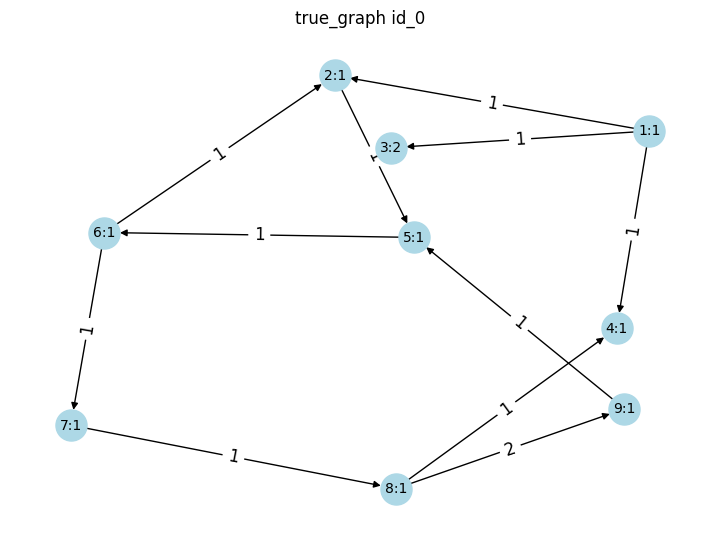

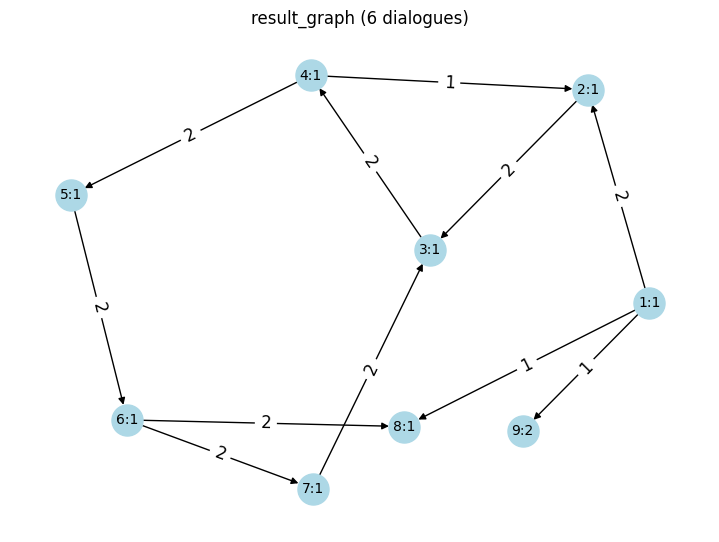

In [21]:
with open("../data/gen24_graphid0_incrementation.json", "r", encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example["graph"])
graphs = [graph for graph in example["incremental"].values()]
result_graph = Graph(graphs[-1])
print(
    "is_same_structure:",
    is_same_structure(true_graph, result_graph),
    "\n----------------",
)
print(
    "----------------\ntriplet_match_accuracy:",
    triplet_match_accuracy(true_graph, result_graph),
)
true_graph.visualise_short("true_graph id_0")
result_graph.visualise_short(f"result_graph ({len(graphs)} dialogues)")

is_same_structure: False 
----------------
(9, 8)
{1: ["Hello! I'm sorry you're experiencing issues. How can I assist you today?"], 2: ["I'm sorry to hear that you're having trouble with your account. Can you please provide more details?"], 3: ['Have you tried resetting your password?'], 4: ["I'm sorry resetting your password didn't help. Would you like me to escalate this issue to our support team?"], 5: ['Certainly! Please provide your new email address.', 'Of course! What email address would you like to use instead?'], 6: ['Your email has been updated successfully. Is there anything else I can help you with?'], 7: ["I've escalated your issue. You should receive an email with further instructions shortly."], 8: ['Thank you for reaching out. Have a great day!', "We're here to help if you need anything else. Goodbye!"]}
----------------
triplet_match_accuracy: {'node_accuracy': 1.0, 'edge_accuracy': 0.7777777777777778}


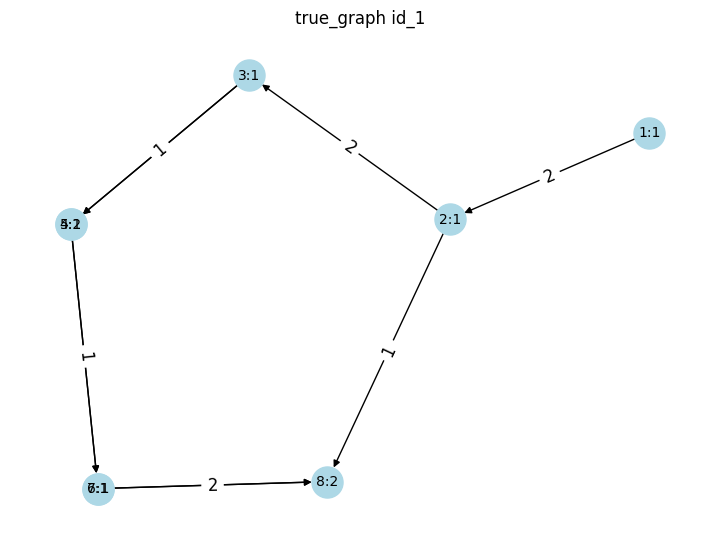

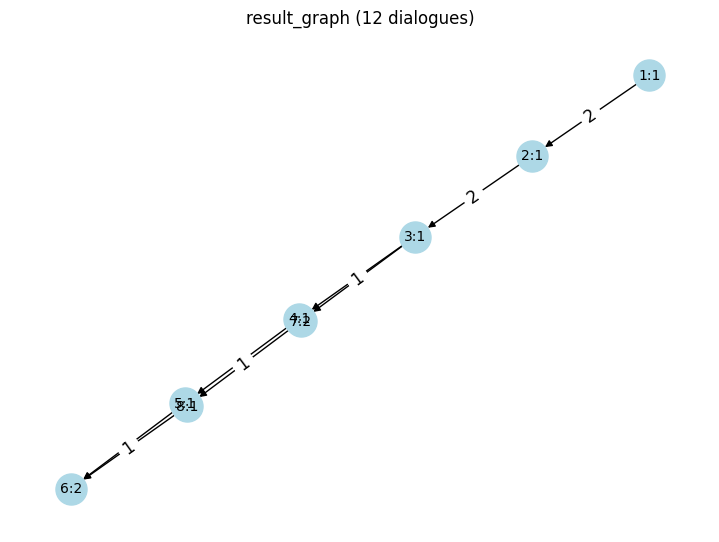

In [22]:
with open("../data/gen24_graphid1_incrementation.json", "r", encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example["graph"])
graphs = [graph for graph in example["incremental"].values()]
result_graph = Graph(graphs[-1])
print(
    "is_same_structure:",
    is_same_structure(true_graph, result_graph),
    "\n----------------",
)
print(
    "----------------\ntriplet_match_accuracy:",
    triplet_match_accuracy(true_graph, result_graph),
)
true_graph.visualise_short("true_graph id_1")
result_graph.visualise_short(f"result_graph ({len(graphs)} dialogues)")

is_same_structure: False 
----------------
(20, 18)
{1: ['Hello! How can I assist you today?'], 2: ["Sure, could you please specify the chatbot limitations you're facing?"], 3: ["I'm sorry to hear that. Can you provide more details about the fake account?"], 4: ['Certainly! Are you looking to respond to positive or negative reviews?'], 5: ['I understand. To help reduce delays, you can try optimizing your response scripts.'], 6: ["I'm sorry the chatbot isn't understanding user queries. You might consider updating its training data."], 7: ['To report impersonation, please visit our support page and submit the account details.'], 8: ['If the account is sending spam messages, you can block and report it directly from the platform.'], 9: ['When responding to negative reviews, maintain professionalism and address the concerns raised.'], 10: ['Acknowledge positive feedback and thank customers for their support to encourage loyalty.'], 11: ['Thank you for reaching out. If you need further assi

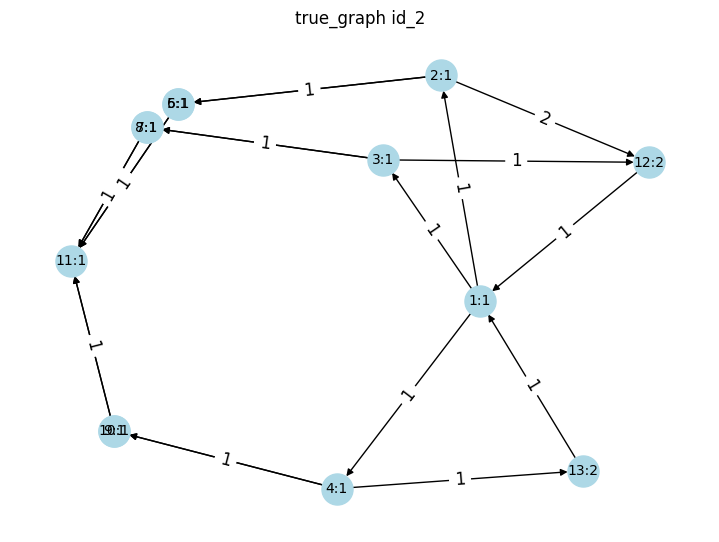

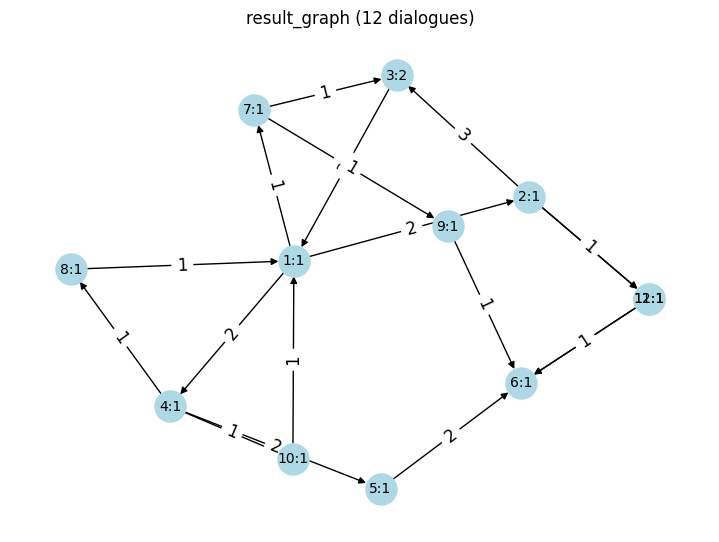

In [23]:
with open("../data/gen24_graphid2_incrementation.json", "r", encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example["graph"])
graphs = [graph for graph in example["incremental"].values()]
result_graph = Graph(graphs[-1])
print(
    "is_same_structure:",
    is_same_structure(true_graph, result_graph),
    "\n----------------",
)
print(
    "----------------\ntriplet_match_accuracy:",
    triplet_match_accuracy(true_graph, result_graph),
)
true_graph.visualise_short("true_graph id_2")
result_graph.visualise_short(f"result_graph ({len(graphs)} dialogues)")

is_same_structure: True 
----------------
Graphs are isomorphic
(13, 13)
{1: ['Hello! How can I assist you with eco-friendly packaging today?', 'Hi there! What would you like to know about eco-friendly packaging?'], 2: ['Sure! There are several types of eco-friendly packaging such as biodegradable materials, recyclable plastics, and compostable containers. Would you like more details on any of these?'], 3: ['Absolutely! For businesses, sustainable packaging options include using recycled materials, reducing packaging size, and opting for reusable containers. Which of these are you interested in?'], 4: ['Eco-friendly packaging costs can vary based on materials and volume. Generally, they might be slightly more expensive upfront but can lead to savings in the long run through sustainability certifications and consumer preferences. Would you like a detailed cost analysis?'], 5: ['Of course! What types of eco-friendly packaging are you interested in exploring?'], 6: ['No problem! Which sus

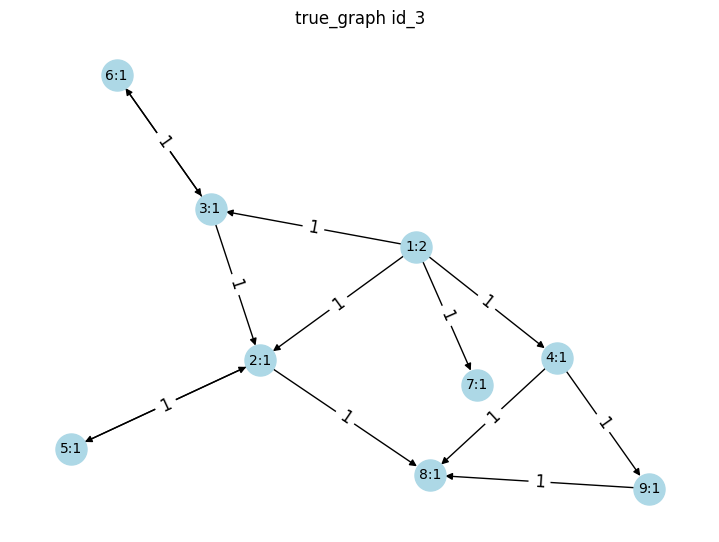

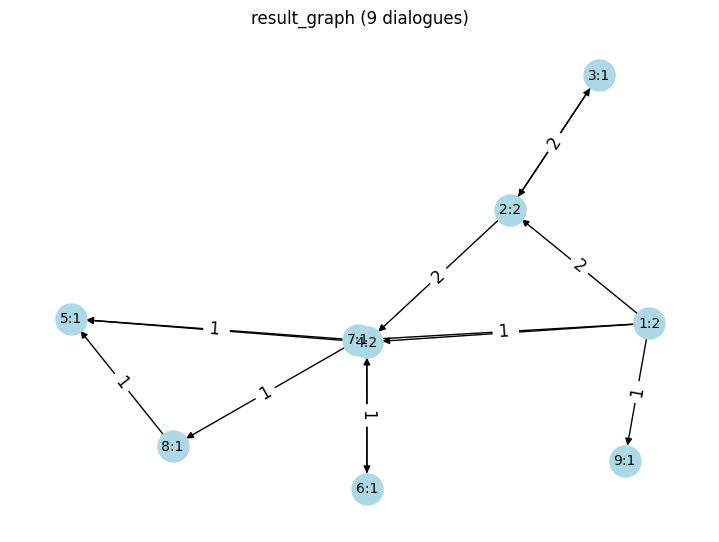

In [24]:
with open("../data/gen24_graphid3_incrementation.json", "r", encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example["graph"])
graphs = [graph for graph in example["incremental"].values()]
result_graph = Graph(graphs[-1])
print(
    "is_same_structure:",
    is_same_structure(true_graph, result_graph),
    "\n----------------",
)
print(
    "----------------\ntriplet_match_accuracy:",
    triplet_match_accuracy(true_graph, result_graph),
)
true_graph.visualise_short("true_graph id_3")
result_graph.visualise_short(f"result_graph ({len(graphs)} dialogues)")

is_same_structure: False 
----------------
(16, 15)
{1: ['Hello! How can I assist you today?'], 2: ['I understand you have concerns about ethical sourcing. Could you please elaborate on what specifically worries you?'], 3: ['We ensure ethical standards by regularly auditing our suppliers and requiring certifications such as Fair Trade. Would you like more details on our auditing process?'], 4: ['We take the environmental impact seriously by using sustainable materials and reducing our carbon footprint. Would you like to know about our sustainability initiatives?'], 5: ["Sure, let's focus on labor practices. We ensure fair wages and safe working conditions through our comprehensive policies. Do you have specific questions on labor ethics?"], 6: ['Absolutely! Our auditing process includes on-site visits and regular reporting to ensure compliance. Do you have any other questions?', 'Certainly! We conduct thorough inspections and partner with third-party auditors to maintain our standards.

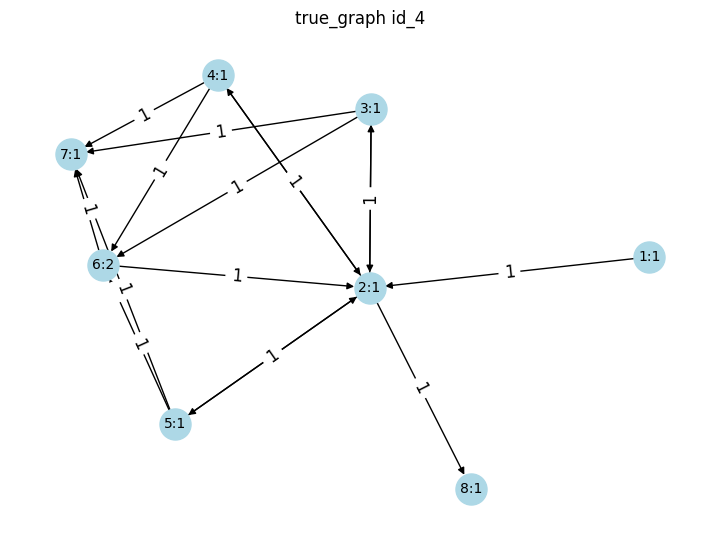

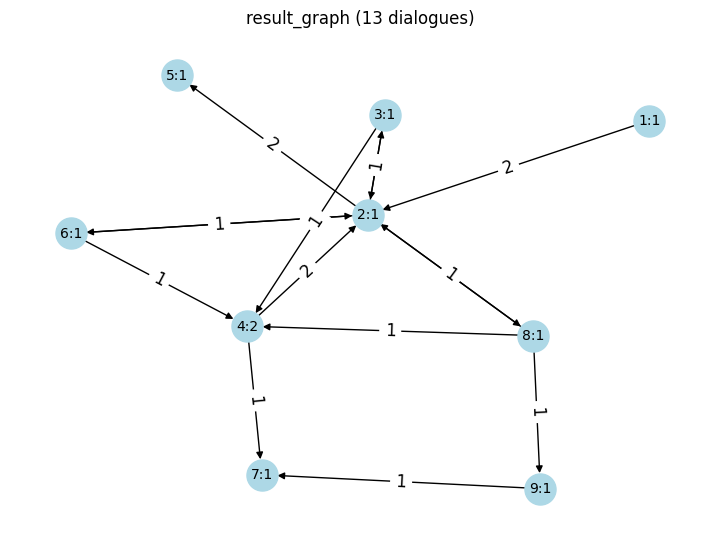

In [25]:
with open("../data/gen24_graphid4_incrementation.json", "r", encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example["graph"])
graphs = [graph for graph in example["incremental"].values()]
result_graph = Graph(graphs[-1])
print(
    "is_same_structure:",
    is_same_structure(true_graph, result_graph),
    "\n----------------",
)
print(
    "----------------\ntriplet_match_accuracy:",
    triplet_match_accuracy(true_graph, result_graph),
)
true_graph.visualise_short("true_graph id_4")
result_graph.visualise_short(f"result_graph ({len(graphs)} dialogues)")

Вывод: Качество генерации на первых 5 графах из generated_24 не идеальное: визуализации эталонного и последнего сгенерированного графов различаются во всех случаях, метрики хорошие в 2 случаях из 5 (6 и 9 диалогов соответственно). Для генерации использована модель o3-mini без указания температуры.